# Regenvorhersage in Australien
Ziel der Aufgabe: Erstellen Sie anhand der Daten Modelle, welche eine Regenvorhersage für den nächsten Tag liefert.

Bonus: Ihre Modelle sollten zusätzlich eine Vorhersage für denselben Tag erzeugen.

In [6]:
#gesammelter Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras.api._v2.keras as keras #keras für die neue tensorflow version

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

from keras import backend
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import svm


#from google.colab import drive
#drive.mount("/content/drive")

## mit den Daten vertraut machen

In [7]:
original_data = pd.read_csv("weatherAUS.csv") #("/content/drive/MyDrive/Python/Projektarbeit/weatherAUS.csv") #("weatherAUS.csv")
original_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
original_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
original_data.describe(include = "all") #count ist ungleich --> Anzahl der Daten sollte überall gleich sein

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


### zur Modellbildung aufbereiten 1/2

Alle unbekannten Werte zu NaN umwandeln

In [41]:
original_data.replace(["?", " ", "-" ,None], np.nan, inplace = True)

Handling von NaN

In [11]:
# NaN pro column zählen
def count_NaN(data):
    # Initialisierung
    count = []
    percentage = []
    i = 0
    total = 0

    # über columns iterieren
    for col in data.columns:
        NaN_df = data[[col]].isna()
        total += data[[col]].shape[0]
        count.append(sum(NaN_df.to_numpy())[0])
        percentage_value = (count[i]/data.shape[0])*100
        percentage.append(f"{round(percentage_value,2)} %")
        i += 1
    
    # total ergänzen
    count.append(sum(count))
    percentage.append(f"{round((count[-1]/total)*100,2)} %")

    # Indices 
    count_df = pd.DataFrame({"NaN count": count, "NaN percentage": percentage})
    col_list = data.columns.to_list()
    col_list.append("Total")
    count_df.index = col_list

    return count_df

In [12]:
count_table = count_NaN(original_data)
count_table

,NaN count,NaN percentage
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


In [42]:
# NaN in numerischen Daten mit Medianwert des jeweiligen Columns ersetzen
def convert_NaN_numerical(df, cols_to_convert):
    # Iterieren über umzuwandelnde Columns 
    for col in cols_to_convert:
        median = np.median(df[col].dropna().to_numpy())
        df[col].fillna(median, inplace = True)
    return df

In [43]:
categorial_data = ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
cols_to_convert = original_data.columns.drop(categorial_data)

converted_data = convert_NaN_numerical(original_data, cols_to_convert) 
converted_data

,Date,RainySeason,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure
0,0,1,2,0.253976,0.252177,0.001617,0.033103,0.57931,13,0.294574,...,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0,0,0.451131
1,0,1,2,0.182695,0.300363,0.000000,0.033103,0.57931,14,0.294574,...,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0,0,0.480919
2,0,1,2,0.285916,0.294404,0.000000,0.033103,0.57931,15,0.310078,...,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0,0,0.463541
3,0,1,2,0.210897,0.357845,0.000000,0.033103,0.57931,4,0.139535,...,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0,0,0.580616
4,0,1,2,0.315095,0.452426,0.002695,0.033103,0.57931,13,0.271318,...,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0,0,0.467635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2,0,41,0.114864,0.233201,0.000000,0.033103,0.57931,0,0.193798,...,0.27,0.730579,0.7056,0.555556,0.555556,0.350211,0.504798,0,0,0.710330
140783,2,0,41,0.111543,0.263032,0.000000,0.033103,0.57931,0,0.193798,...,0.24,0.728926,0.6912,0.555556,0.555556,0.364979,0.533589,0,0,0.701920
140784,2,0,41,0.119420,0.304680,0.000000,0.033103,0.57931,6,0.124031,...,0.21,0.710744,0.6720,0.555556,0.555556,0.381857,0.573896,0,0,0.682621
140785,2,0,41,0.139731,0.340474,0.000000,0.033103,0.57931,3,0.240310,...,0.24,0.669421,0.6352,0.555556,0.555556,0.415612,0.604607,0,0,0.642422


In [15]:
count_table = count_NaN(converted_data)
count_table

,NaN count,NaN percentage
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
Evaporation,0,0.0 %
Sunshine,0,0.0 %
WindGustDir,10326,7.1 %
WindGustSpeed,0,0.0 %
WindDir9am,10566,7.26 %


In [16]:
# NaN in kategorischen Daten mit most frequent value des jeweiligen Columns ersetzen
def convert_NaN_categorical(df, cols_to_convert):
    # Iterieren über umzuwandelnde Columns
    for col in cols_to_convert:
        most_frequent = df[col].value_counts().index[0]
        df[col].fillna(most_frequent,inplace=True)
    return df

In [1]:
cols_to_convert = categorial_data[0:-2]
converted_data = convert_NaN_categorical(converted_data,cols_to_convert)
converted_data

NameError: name 'categorial_data' is not defined

In [18]:
count_table = count_NaN(converted_data)
count_table

,NaN count,NaN percentage
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
Evaporation,0,0.0 %
Sunshine,0,0.0 %
WindGustDir,0,0.0 %
WindGustSpeed,0,0.0 %
WindDir9am,0,0.0 %


In [19]:
# Rows mit NaN in target data rausschmeißen
converted_data.dropna(axis = 0, inplace = True)

count_table = count_NaN(converted_data)
count_table

,NaN count,NaN percentage
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
Evaporation,0,0.0 %
Sunshine,0,0.0 %
WindGustDir,0,0.0 %
WindGustSpeed,0,0.0 %
WindDir9am,0,0.0 %


In [20]:
# Resetting index
converted_data.reset_index(inplace=True)
converted_data.drop("index",axis=1,inplace=True)
converted_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
140783,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
140784,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
140785,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [21]:
# Dictionary mit kategorischen Bezeichnungen
categorial_data_names = {}

def create_categorical_names(X, cols_to_name):
    # Iterieren über columns 
    for col in cols_to_name:
        names = []
        full_list = X[col].tolist()

        # Iterieren über Einträge in columns
        for i in range(len(full_list)):
            if full_list[i] not in names:
                names.append(full_list[i])

        # Dictionary bedaten
        categorial_data_names[col] = names

    return categorial_data_names

In [22]:
cols_to_name = categorial_data[1:5]

categorial_data_names = create_categorical_names(converted_data, cols_to_name)

In [23]:
# Dictionary mit kategorischen Bezeichnungen
cols_to_name = categorial_data[1:5]

categorial_data_names = {}

# Location und WindGustDir
for col in cols_to_name[0:2]:
    names = []
    full_list = converted_data[col].tolist()
    
    for i in range(len(full_list)):
        if full_list[i] not in names:
            names.append(full_list[i])

    categorial_data_names[col] = names

# WindDir 9 am
col_to_name = cols_to_name[2]

names = []
full_list = converted_data[col_to_name].tolist()
for i in range(len(full_list)):
    if full_list[i] not in names:
        names.append(full_list[i])

for i,name in enumerate(names):
    names[i] = "9am_"+name

categorial_data_names[col_to_name] = names

# WindDir 3 pm
col_to_name = cols_to_name[3]

names = []
full_list = converted_data[col_to_name].tolist()
for i in range(len(full_list)):
    if full_list[i] not in names:
        names.append(full_list[i])

for i,name in enumerate(names):
    names[i] = "3pm_"+name

categorial_data_names[col_to_name] = names

In [44]:
# Encode kategorische Daten außer Date
def encode_classification(df, col):
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    return df

In [25]:
encoded_data_without_date = converted_data
cols_to_encode = categorial_data[1:]

for col in cols_to_encode:
    encoded_data_without_date = encode_classification(encoded_data_without_date,col)

encoded_data_without_date

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,41,3.5,21.8,0.0,4.8,8.4,0,31.0,2,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
140783,2017-06-21,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
140784,2017-06-22,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
140785,2017-06-23,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [26]:
# Encode Date im Sinne von Jahreszeiten und Klassifikation Regenzeit
def encode_date(df):
    # Initialisierung
    season = []
    rainy_season = []
    dates = pd.to_datetime(df["Date"])
    
    # Iterieren über dates
    for date in dates:
        num_month = date.month
        
        # Zuweisen der Jahreszeiten
        if num_month <= 2 or num_month == 12: # Sommer: Dezember bis Februar -> Klasse 0
            season.append(0)
        elif num_month >= 3 and num_month <= 5: # Herbst: März bis Mai -> Klasse 1
            season.append(1)
        elif num_month >= 6 and num_month <= 8: # Winter: Juni bis August -> Klasse 2
            season.append(2)
        elif num_month >= 9 and num_month <= 11: # Frühling: September bis November -> Klasse 3
            season.append(3)
        
        # Regenzeit ja oder nein
        if num_month >= 11 or num_month <= 4: # Regenzeit: November bis April
            rainy_season.append(1)
        else:
            rainy_season.append(0)        

    # Belegen des Dataframes mit encoded bzw. neuen Features
    df["Date"] = season
    df.insert(1,"RainySeason",rainy_season)

    return df

In [27]:
encoded_data = encode_date(encoded_data_without_date)
encoded_data

,Date,RainySeason,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,2,13.4,22.9,0.6,4.8,8.4,13,44.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,0,1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,0,1,2,12.9,25.7,0.0,4.8,8.4,15,46.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,0,1,2,9.2,28.0,0.0,4.8,8.4,4,24.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,0,1,2,17.5,32.3,1.0,4.8,8.4,13,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2,0,41,3.5,21.8,0.0,4.8,8.4,0,31.0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
140783,2,0,41,2.8,23.4,0.0,4.8,8.4,0,31.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
140784,2,0,41,3.6,25.3,0.0,4.8,8.4,6,22.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
140785,2,0,41,5.4,26.9,0.0,4.8,8.4,3,37.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


## Daten analysieren

In [28]:
#wie korrelieren die Features mit dem Target --> extrem rechenaufwendig, deshalb auskommentiert
"""
%#matplotlib iq

#sns.pairplot(original_data, hue = "RainToday", height = 5)

#plt.title("correlation between all features")
#plt.legend(["rain", "no rain"], loc = "lower right")

#plt.savefig("pairplots_corr.png", bbox_inces = "tight", transparent = False, facecolor = "w")
#plt.show()
"""

'\n%#matplotlib iq\n\n#sns.pairplot(original_data, hue = "RainToday", height = 5)\n\n#plt.title("correlation between all features")\n#plt.legend(["rain", "no rain"], loc = "lower right")\n\n#plt.savefig("pairplots_corr.png", bbox_inces = "tight", transparent = False, facecolor = "w")\n#plt.show()\n'

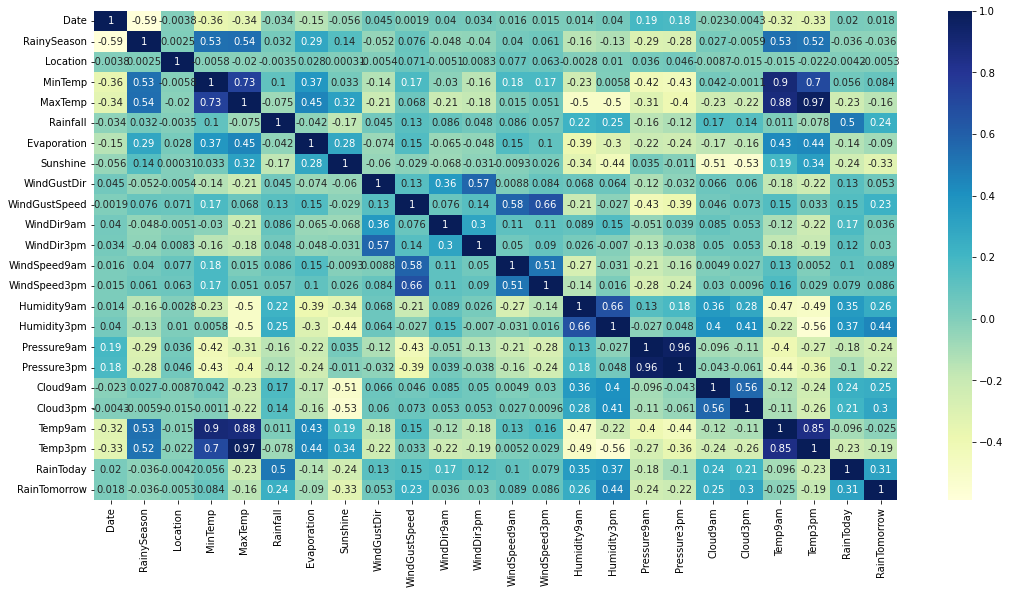

In [29]:
#wie korrelieren die Features untereinander
#%matplotlib inline

plt.figure(figsize = (18, 9))
sns.heatmap(encoded_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

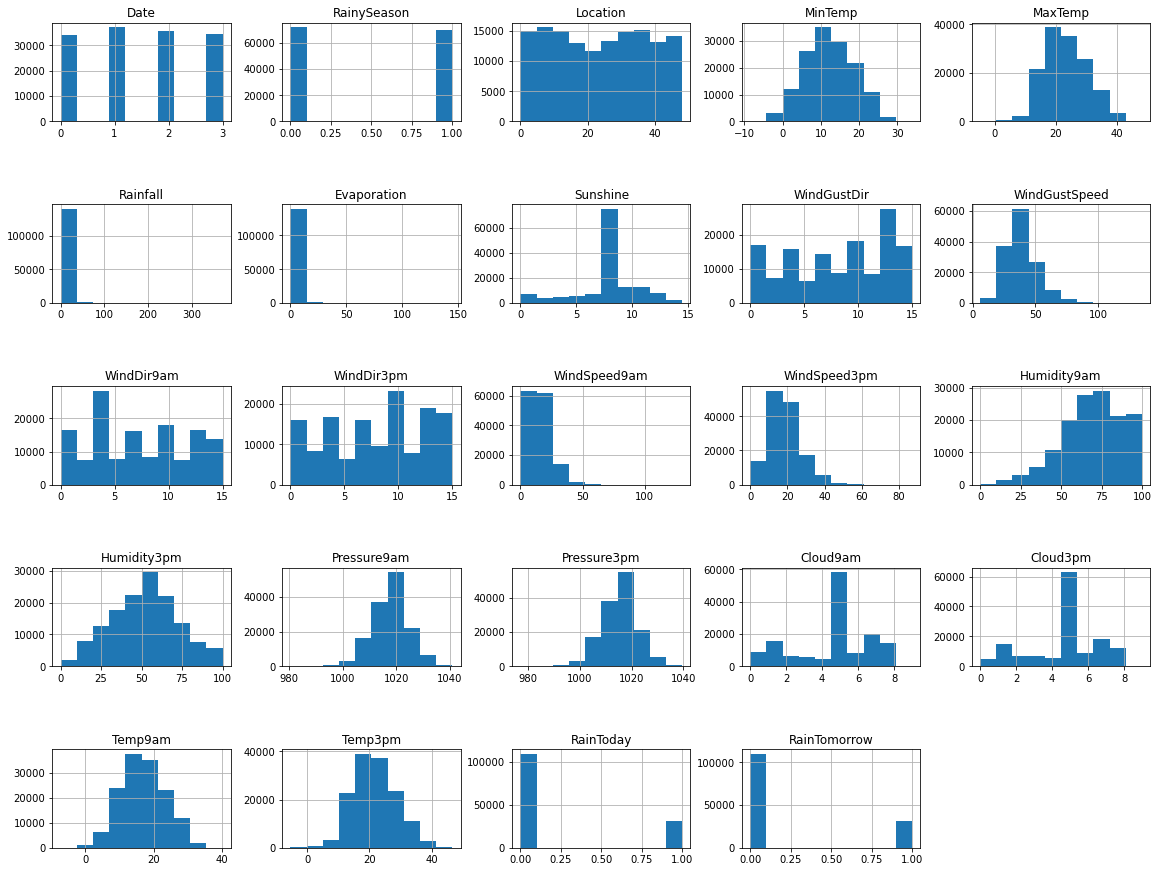

In [30]:
encoded_data.hist(figsize = (16, 12))
plt.tight_layout(pad = 0.3, w_pad = 0.5, h_pad = 5)

plt.show()

### zur Modellbildung aufbereiten 2/2

In [31]:
#korrelierende Daten miteinander vereinen
encoded_data["MaxTemp"] = encoded_data["MaxTemp"] * encoded_data["Temp3pm"] #evtl unsinnig, dass man Temps. miteinander MULTIPLIZIERT
encoded_data["MinTemp"] = encoded_data["MinTemp"] * encoded_data["Temp9am"]
encoded_data["Pressure"] = encoded_data["Pressure9am"] * encoded_data["Pressure3pm"] #evtl immer den höheren Wert der beiden nehmen

#alte columns droppen
encoded_data4 = encoded_data.drop("Temp3pm", axis = 1) #Überschreiben von data ok
encoded_data3 = encoded_data4.drop("Temp9am", axis = 1)
encoded_data2 = encoded_data3.drop("Pressure9am", axis = 1)
encoded_data = encoded_data2.drop("Pressure3pm", axis = 1)

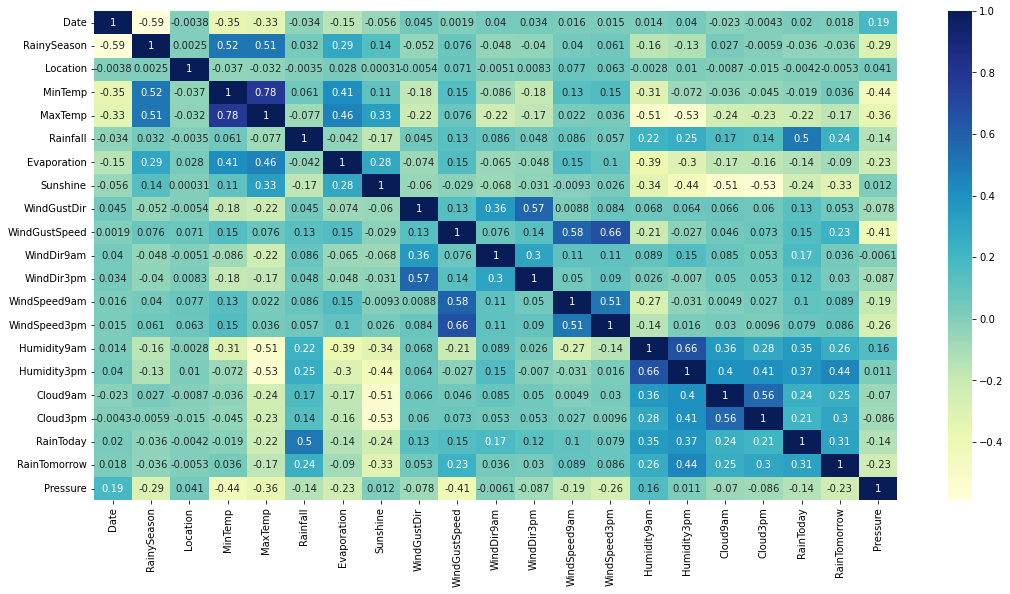

In [32]:
plt.figure(figsize = (18, 9))
sns.heatmap(encoded_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Daten skalieren

In [33]:
# Standardisieren
def standardization(X):
    #Initialisierung
    X_new = X

    # Iterieren über Columns und skalieren der Daten
    for i in range(X.shape[1]):
        if isinstance(X.iloc[0,i],float):
            X_num = X.iloc[:,i].to_numpy()
            X_new.iloc[:,i] = (X_num-np.mean(X_num))/np.std(X_num)
        elif isinstance(X.iloc[0,i],int):
            X_new.iloc[:,i] = X.iloc[:,i]
        else:
            SystemError("Non of the types are right!")           

    return X_new

# Normalisieren
def normalization(X):
    #Initialisierung
    X_new = X

    # Iterieren über Columns und skalieren der Daten
    for i in range(X.shape[1]):
        if isinstance(X.iloc[0,i],float):
            X_num = X.iloc[:,i].to_numpy()
            X_new.iloc[:,i] = (X_num-np.min(X_num))/(np.max(X_num)-np.min(X_num))
        elif isinstance(X.iloc[0,1],int):
            X_new.iloc[:,i] = X.iloc[:,i]
        else:
            SystemError("Non of the types are right!")    

    return X_new

In [34]:
data_scaled_std = standardization(converted_data)
data_scaled_std

,Date,RainySeason,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure
0,0,1,2,-0.092572,-0.157865,-0.206727,-0.12118,0.146068,13,0.311578,...,-1.433926,-1.474141,-1.219942,1.458738,0.141848,-0.013228,0.017149,0,0,-1.358557
1,0,1,2,-0.609855,0.178808,-0.277606,-0.12118,0.146068,14,0.311578,...,-1.287920,-1.044459,-1.115191,0.154823,0.141848,0.033062,0.380877,0,0,-1.090091
2,0,1,2,0.139210,0.137176,-0.277606,-0.12118,0.146068,15,0.463856,...,-1.044576,-1.488958,-0.980512,0.154823,-1.270815,0.619403,0.220837,0,0,-1.246713
3,0,1,2,-0.405195,0.580436,-0.277606,-0.12118,0.146068,4,-1.211197,...,-1.725938,-0.007297,-0.366971,0.154823,0.141848,0.171932,0.700958,0,0,-0.191563
4,0,1,2,0.350963,1.241282,-0.159474,-0.12118,0.146068,13,0.083162,...,-0.898570,-1.014826,-1.384551,1.024100,1.554511,0.125642,1.166530,0,0,-1.209811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2,0,41,-1.102104,-0.290453,-0.277606,-0.12118,0.146068,0,-0.678225,...,-1.190582,1.044682,0.890039,0.154823,0.141848,-1.170481,-0.113793,0,0,0.977485
140783,2,0,41,-1.126200,-0.082021,-0.277606,-0.12118,0.146068,0,-0.678225,...,-1.336588,1.029865,0.755359,0.154823,0.141848,-1.062470,0.104444,0,0,0.901692
140784,2,0,41,-1.069037,0.208975,-0.277606,-0.12118,0.146068,6,-1.363474,...,-1.482595,0.866883,0.575786,0.154823,0.141848,-0.939030,0.409976,0,0,0.727757
140785,2,0,41,-0.921644,0.459069,-0.277606,-0.12118,0.146068,3,-0.221393,...,-1.336588,0.496467,0.231605,0.154823,0.141848,-0.692149,0.642761,0,0,0.365459


In [35]:
data_scaled_norm = normalization(converted_data)
data_scaled_norm

,Date,RainySeason,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure
0,0,1,2,0.253976,0.252177,0.001617,0.033103,0.57931,13,0.294574,...,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0,0,0.451131
1,0,1,2,0.182695,0.300363,0.000000,0.033103,0.57931,14,0.294574,...,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0,0,0.480919
2,0,1,2,0.285916,0.294404,0.000000,0.033103,0.57931,15,0.310078,...,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0,0,0.463541
3,0,1,2,0.210897,0.357845,0.000000,0.033103,0.57931,4,0.139535,...,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0,0,0.580616
4,0,1,2,0.315095,0.452426,0.002695,0.033103,0.57931,13,0.271318,...,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0,0,0.467635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2,0,41,0.114864,0.233201,0.000000,0.033103,0.57931,0,0.193798,...,0.27,0.730579,0.7056,0.555556,0.555556,0.350211,0.504798,0,0,0.710330
140783,2,0,41,0.111543,0.263032,0.000000,0.033103,0.57931,0,0.193798,...,0.24,0.728926,0.6912,0.555556,0.555556,0.364979,0.533589,0,0,0.701920
140784,2,0,41,0.119420,0.304680,0.000000,0.033103,0.57931,6,0.124031,...,0.21,0.710744,0.6720,0.555556,0.555556,0.381857,0.573896,0,0,0.682621
140785,2,0,41,0.139731,0.340474,0.000000,0.033103,0.57931,3,0.240310,...,0.24,0.669421,0.6352,0.555556,0.555556,0.415612,0.604607,0,0,0.642422


#### One-hot Encoding

In [45]:
def one_hot_encoding(X,cols_to_encode):
    # Initialisierung
    one_hot_encoder = OneHotEncoder(handle_unknown = "ignore")
    X_new = X
    
    # Loop
    for col in cols_to_encode:
        ohe_data = pd.DataFrame(one_hot_encoder.fit_transform(encoded_data[[col]]).toarray())
        ohe_data.columns = categorial_data_names[col]
        X_new = X_new.join(ohe_data) 
        X_new.drop(col, axis = 1, inplace = True)

    return X_new

In [46]:
if "RainySeason" not in categorial_data:
    categorial_data.append("RainySeason")

# Date zu categorical data names
categorial_data_names["Date"] = ["Summer","Fall","Winter","Spring"]

# One hot encoding
cols_to_encode = categorial_data[0:5]

one_hot_encoded_data = one_hot_encoding(data_scaled_std, cols_to_encode)

one_hot_encoded_data

,RainySeason,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,3pm_ESE,3pm_ENE,3pm_NNW,3pm_SSW,3pm_SW,3pm_SE,3pm_N,3pm_S,3pm_NNE,3pm_NE
0,1,0.253976,0.252177,0.001617,0.033103,0.57931,0.294574,0.153846,0.275862,0.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.182695,0.300363,0.000000,0.033103,0.57931,0.294574,0.030769,0.252874,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.285916,0.294404,0.000000,0.033103,0.57931,0.310078,0.146154,0.298851,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.210897,0.357845,0.000000,0.033103,0.57931,0.139535,0.084615,0.103448,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.315095,0.452426,0.002695,0.033103,0.57931,0.271318,0.053846,0.229885,0.82,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0.114864,0.233201,0.000000,0.033103,0.57931,0.193798,0.115385,0.149425,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140783,0,0.111543,0.263032,0.000000,0.033103,0.57931,0.193798,0.100000,0.126437,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140784,0,0.119420,0.304680,0.000000,0.033103,0.57931,0.124031,0.100000,0.103448,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140785,0,0.139731,0.340474,0.000000,0.033103,0.57931,0.240310,0.069231,0.103448,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# Restliche Ints zu Floats
for col in categorial_data[-3:]:
    one_hot_encoded_data[col] = one_hot_encoded_data[col].astype(float)

one_hot_encoded_data

,RainySeason,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,3pm_ESE,3pm_ENE,3pm_NNW,3pm_SSW,3pm_SW,3pm_SE,3pm_N,3pm_S,3pm_NNE,3pm_NE
0,1.0,0.253976,0.252177,0.001617,0.033103,0.57931,0.294574,0.153846,0.275862,0.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.182695,0.300363,0.000000,0.033103,0.57931,0.294574,0.030769,0.252874,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.285916,0.294404,0.000000,0.033103,0.57931,0.310078,0.146154,0.298851,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.210897,0.357845,0.000000,0.033103,0.57931,0.139535,0.084615,0.103448,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.315095,0.452426,0.002695,0.033103,0.57931,0.271318,0.053846,0.229885,0.82,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.0,0.114864,0.233201,0.000000,0.033103,0.57931,0.193798,0.115385,0.149425,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140783,0.0,0.111543,0.263032,0.000000,0.033103,0.57931,0.193798,0.100000,0.126437,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140784,0.0,0.119420,0.304680,0.000000,0.033103,0.57931,0.124031,0.100000,0.103448,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140785,0.0,0.139731,0.340474,0.000000,0.033103,0.57931,0.240310,0.069231,0.103448,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [264]:
#als letzten Schritt nach dem Aufbereiten die Daten "data" nennen, um leicht damit zu arbeiten
data = one_hot_encoded_data

#darauf achten, dass zum Ende alle Daten das selbe Format haben
print(data.dtypes)

RainySeason    float64
MinTemp        float64
MaxTemp        float64
Rainfall       float64
Evaporation    float64
                ...   
3pm_SE         float64
3pm_N          float64
3pm_S          float64
3pm_NNE        float64
3pm_NE         float64
Length: 121, dtype: object


## unterschiedliche Modelle

In [265]:
#Daten für die Modelle aufteilen
y = data[["RainTomorrow"]] #nur "RainTomorrow" für die prediction. Nachher "RainToday" direkt abfragen (ist keine Vorhersage)
x = data.drop("RainTomorrow", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [266]:
#weiterer Split der Trainingsdaten in "Optimierungsdaten". Damit wird der RandomSearch betrieben
x_train_optimize, x_test_optimize, y_train_optimize, y_test_optimize = train_test_split(x_train, y_train, test_size = 0.20, random_state = 2)

### Decision Tree

In [267]:
#erzeuge Modell
model_decisionTree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 5, min_samples_split = 3)

#fitte Modell
model_decisionTree.fit(x_train_optimize, y_train_optimize)

#Vorhersagen
y_train_pred_DT = model_decisionTree.predict(x_train_optimize)
y_test_pred_DT = model_decisionTree.predict(x_test_optimize)

#Genauigkeit mit berechnen
train_accuracy_DT = accuracy_score(y_train_optimize, y_train_pred_DT) #DT = DecisionTree
test_accuracy_DT = accuracy_score(y_test_optimize, y_test_pred_DT)

### Naive Bayes

In [268]:
print(tf.__version__) #wegen der aktuellen Version funktioniert keras nicht. Deshalb der Extraimport

2.9.1


In [269]:
#Scaler zuordnen
sc = StandardScaler()
x_train_optimize = sc.fit_transform(x_train_optimize)
x_test_optimize = sc.transform(x_test_optimize)

#erzeuge Modell
model_naiveBayes = GaussianNB()

#fitte Modell
model_naiveBayes.fit(x_train_optimize, y_train_optimize)

#Vorhersagen
y_train_pred_NB = model_naiveBayes.predict(x_train_optimize)
y_test_pred_NB = model_naiveBayes.predict(y_test_optimize)

#Genauigkeit mit berechnen
train_accuracy_NB = accuracy_score(y_train_optimize, y_train_pred_NB) #NB = NaiveBayes 
test_accuracy_NB = accuracy_score(y_test_optimize, y_test_pred_NB)

c:\Users\Kevin Settler\anaconda3-neu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Ergebnisse der Modelle miteinander vergleichen

Decision Tree

In [270]:
#Ausgaben der Genauigkeit beim Decision Tree
print("Training accuracy (Decision Tree): ", train_accuracy_DT)
print("Test accuracy (Decision Tree): ", test_accuracy_DT)

Training accuracy (Decision Tree):  0.8531458442005261
Test accuracy (Decision Tree):  0.8412945041285625


In [271]:
#Fehlerrate anschauen
print("MAE with initial parameter: ", metrics.mean_absolute_error(y_test_optimize, y_test_pred_DT))
print("MSE with initial parameter: ", metrics.mean_squared_error(y_test_optimize, y_test_pred_DT))
print("RMSE with initial parameter: ", np.sqrt(metrics.mean_squared_error(y_test_optimize, y_test_pred_DT)))

MAE with initial parameter:  0.15870549587143745
MSE with initial parameter:  0.15870549587143745
RMSE with initial parameter:  0.3983785836003706


Naive Bayes

In [272]:
#Ausgaben der Genauigkeit bei Naive Bayes
print("Training accuracy (Naive Bayes): ", train_accuracy_NB)
print("Test accuracy (Naive Bayes): ", test_accuracy_NB)

Training accuracy (Naive Bayes):  0.6555275629002364
Test accuracy (Naive Bayes):  0.7842049187605433


In [273]:
#Fehlerrate anschauen
print("MAE with initial parameter: ", metrics.mean_absolute_error(y_test_optimize, y_test_pred_NB))
print("MSE with initial parameter: ", metrics.mean_squared_error(y_test_optimize, y_test_pred_NB))
print("RMSE with initial parameter: ", np.sqrt(metrics.mean_squared_error(y_test_optimize, y_test_pred_NB)))

MAE with initial parameter:  0.21579508123945662
MSE with initial parameter:  0.21579508123945662
RMSE with initial parameter:  0.46453749174792835


### Hyperparameter optimieren

Decision Tree: GridSearchCV

In [274]:
#GridSearch verwenden, um das Modell zu optimieren
parameters_GS = {"max_depth": [2, 4, 5, 6, 8], "min_samples_leaf": [2, 4, 6, 8, 10], "min_samples_split": [2, 4, 6, 8, 10]}
clf = GridSearchCV(model_decisionTree, parameters_GS, cv = 5)
clf.fit(x_train_optimize, y_train_optimize)

y_train_pred_DT_GS = clf.predict(x_train_optimize) #DT_GS = DecisionTree with GridSearch
y_test_pred_DT_GS = clf.predict(x_test_optimize)

train_accuracy_DT_GS = accuracy_score(y_train_optimize, y_train_pred_DT_GS)
test_accuracy_DT_GS = accuracy_score(y_test_optimize, y_test_pred_DT_GS)

print("The training accuracy is ", train_accuracy_DT_GS)
print("The test_accuracy is ", test_accuracy_DT_GS)

The training accuracy is  0.8523578571190749
The test_accuracy is  0.8413832904199592


In [275]:
#die besten Parameter und den besten score anzeigen lassen
kwargs = clf.best_params_
print("best parameter after Grid Search: ", kwargs)
print("the best score is: ", clf.best_score_)

best parameter after Grid Search:  {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 4}
the best score is:  0.841181764079532


In [276]:
#die Hyperparameter einsetzen
tuned_model_decisionTree = DecisionTreeClassifier(**kwargs) #insert best params

tuned_model_decisionTree.fit(x_train_optimize, y_train_optimize)

tuned_y_train_pred_DT = model_decisionTree.predict(x_train_optimize)
tuned_y_test_pred_DT = model_decisionTree.predict(x_test_optimize)

tuned_train_accuracy_DT = accuracy_score(y_train_optimize, tuned_y_train_pred_DT) #DT = DecisionTree
tuned_test_accuracy_DT = accuracy_score(y_test_optimize, tuned_y_test_pred_DT)

print("Training accuracy (Decision Tree): ", tuned_train_accuracy_DT)
print("Test accuracy (Decision Tree): ", tuned_test_accuracy_DT)

Training accuracy (Decision Tree):  0.7860337613619969
Test accuracy (Decision Tree):  0.7858474651513806


In [277]:
#Fehlerrate anschauen
print("MAE with initial parameter: ", metrics.mean_absolute_error(y_test_optimize, y_test_pred_DT))
print("MSE with initial parameter: ", metrics.mean_squared_error(y_test_optimize, y_test_pred_DT))
print("RMSE with initial parameter: ", np.sqrt(metrics.mean_squared_error(y_test_optimize, y_test_pred_DT)))

print("\n")

print("MAE with tuned parameter: ", metrics.mean_absolute_error(y_test_optimize, tuned_y_test_pred_DT))
print("MSE with tuned parameter: ", metrics.mean_squared_error(y_test_optimize, tuned_y_test_pred_DT))
print("RMSE with tuned parameter: ", np.sqrt(metrics.mean_squared_error(y_test_optimize, tuned_y_test_pred_DT)))

MAE with initial parameter:  0.15870549587143745
MSE with initial parameter:  0.15870549587143745
RMSE with initial parameter:  0.3983785836003706


MAE with tuned parameter:  0.21415253484861937
MSE with tuned parameter:  0.21415253484861937
RMSE with tuned parameter:  0.4627661772954235


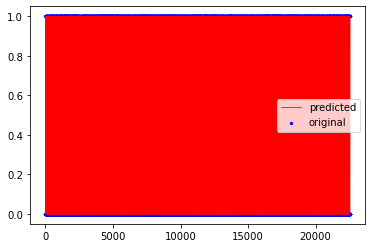

In [278]:
#visualisieren der Ergebnisse im plot
x_ax = range(len(y_test_optimize))
plt.scatter(x_ax, y_test_optimize, s = 5, color = "blue", label = "original")
plt.plot(x_ax, tuned_y_test_pred_DT, lw = 0.8, color = "red", label = "predicted")
plt.legend()
plt.show()

Naive Bayes: TensorFlow

In [279]:
model_naiveBayes = Sequential()
model_naiveBayes.add(Dense(5, kernel_initializer = "uniform", activation = "relu", input_dim = 120))
model_naiveBayes.add(Dense(5, kernel_initializer = "uniform", activation = "relu"))
model_naiveBayes.add(Dense(20, kernel_initializer = "uniform", activation = "relu"))
model_naiveBayes.add(Dense(15, kernel_initializer = "uniform", activation = "relu"))
model_naiveBayes.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

#wie viele Parameter habe ich zu trainieren
model_naiveBayes.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 605       
                                                                 
 dense_21 (Dense)            (None, 5)                 30        
                                                                 
 dense_22 (Dense)            (None, 20)                120       
                                                                 
 dense_23 (Dense)            (None, 15)                315       
                                                                 
 dense_24 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [280]:
model_naiveBayes.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model_naiveBayes.fit(x_train_optimize, y_train_optimize, batch_size = 20, epochs = 200)

Epoch 1/200
4506/4506 [==============================] - 6s 1ms/step - loss: 0.3727 - accuracy: 0.8367
Epoch 2/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3436 - accuracy: 0.8537
Epoch 3/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3383 - accuracy: 0.8547
Epoch 4/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3346 - accuracy: 0.8556
Epoch 5/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3324 - accuracy: 0.8571
Epoch 6/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3311 - accuracy: 0.8570
Epoch 7/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3298 - accuracy: 0.8581
Epoch 8/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3292 - accuracy: 0.8580
Epoch 9/200
4506/4506 [==============================] - 5s 1ms/step - loss: 0.3285 - accuracy: 0.8582
Epoch 10/200
4506/4506 [==============================] - 5s 1ms/step - l

In [281]:
# das Modell neigt bei reduzierten Datensätzen zum overfitting

## Durchführen des gesamten Modells

In [282]:
#Decision Tree mit den Ergebnissen aus dem Grid Search auf die gesamten Daten anwenden
model = DecisionTreeClassifier(**kwargs)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Genauigkeit berechnen und abfragen
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.8510507950882987
Test accuracy:  0.8415370409830244


In [283]:
#Fehlerrate anschauen
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE:  0.15846295901697563
MSE:  0.15846295901697563
RMSE:  0.3980740622258321
